In [1]:
import praw
import pprint

reddit_password = open('reddit_password.txt', 'r').read()

pp = pprint.PrettyPrinter(indent=2)
reddit = praw.Reddit(client_id='FAaXC-ElYEyckw',
                    client_secret='518Na1MaF7YZKM92fU87Hi-e49c',
                    username='abossnamedtza',
                    password=reddit_password,
                    user_agent='prawtutorial')

In [28]:
#submission id
id = 'a4fhej'

submission = reddit.submission(id=id)
print('Submission Title:', submission.title)

Submission Title: [Official] UFC 231: Holloway vs. Ortega - Live Discussion Thread


In [70]:
#get comments within time frame
start_time = 1544332800
end_time = 1544336400
interval = 60

In [71]:
#set up time intervals in dictionary
comment_list = {}

for time in range(start_time, end_time, interval):
    comment_list[time] = set()

In [72]:
#get comments from post
submission.comments.replace_more(limit=0)

for comment in submission.comments.list():
    comment_creation_time = int(comment.created_utc)
    key = [k for k in comment_list if comment_creation_time >= k and comment_creation_time < (k+interval)]
    
    if key:
        comment_text = comment.body.encode('utf-8')
        comment_list[key[0]].add(comment_text)
        
pp.pprint(comment_list)

{ 1544332800: { b'Fighter goes from winning dominantly to winning slightly les'
                b's dominantly. Commentators, "she must be gassed".',
                b"I'd guess 4-1 for Valentina. JJ got heart but she just seeme"
                b'd so outclassed.'},
  1544332860: set(),
  1544332920: set(),
  1544332980: set(),
  1544333040: { b'Joe switching sides again, lol.\n\n"I wonder if this cut i'
                b's too much for Valentina."\n"You did great at 135 but this is'
                b' your natural weight class!"',
                b"She's switched it from English, to Spanish to Russian(?) sou"
                b'nded very fluent.',
                b'That transition from Spanish to Russian was so fucking smoot'
                b'h.'},
  1544333100: { b'Antonina is a hottie',
                b'Her Spanish is better than her English',
                b'So much salt.\n\n"Not her best performance" - are y\'all hi'
                b'gh? She just easily beat (4 rounds to 1) J

<h3>Sentiment Analysis Using Watson</h3>

In [63]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, SentimentOptions

nlu = NaturalLanguageUnderstandingV1(version='2018-03-16',
                                    iam_apikey='o9wOQZs9s6tau9YtCn8QKshDi-Vh6Q7-6tC7ptVzmZSh',
                                    url='https://gateway.watsonplatform.net/natural-language-understanding/api')

In [73]:
#get sentiment values
tracker = dict.fromkeys(comment_list.keys(), 0)

for timestamp in comment_list:
    if comment_list[timestamp]:
        for comment in comment_list[timestamp]:
            comment = str(comment)
            
            try:
                response = nlu.analyze(text=comment,
                                    features=Features(sentiment=
                                                      SentimentOptions(targets=
                                                                       [comment.split(' ')[0]]))).get_result()
                sentiment = response['sentiment']['document']['score']
                
                tracker[timestamp] += sentiment
                    
            except:
                continue
                
tracker

{1544332800: -0.806467,
 1544332860: 0,
 1544332920: 0,
 1544332980: 0,
 1544333040: 0.31037,
 1544333100: 0.9993829999999999,
 1544333160: -2.7981710000000004,
 1544333220: -1.478201,
 1544333280: -0.884169,
 1544333340: 0,
 1544333400: 0,
 1544333460: -0.445974,
 1544333520: 0,
 1544333580: 0,
 1544333640: -0.92851,
 1544333700: 0,
 1544333760: -0.789041,
 1544333820: -0.611784,
 1544333880: 0,
 1544333940: 0,
 1544334000: 0,
 1544334060: 0,
 1544334120: 0,
 1544334180: 0,
 1544334240: -1.382878,
 1544334300: -0.947797,
 1544334360: 0,
 1544334420: 0,
 1544334480: 0,
 1544334540: 0,
 1544334600: -0.76625,
 1544334660: -1.3628239999999998,
 1544334720: 0,
 1544334780: 0,
 1544334840: 0,
 1544334900: 0,
 1544334960: -1.632993,
 1544335020: -0.621636,
 1544335080: 0,
 1544335140: 0,
 1544335200: 0,
 1544335260: -0.971984,
 1544335320: -0.11915399999999998,
 1544335380: -1.602047,
 1544335440: -1.6496499999999998,
 1544335500: -1.582524,
 1544335560: -1.304218,
 1544335620: -0.62071,
 15

<h3>Charting Sentiment</h3>

In [215]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as patches
import numpy as np
from datetime import datetime
%matplotlib inline

In [75]:
#grab max and min values of tracker
abs_value = abs(max(tracker.values(), key=abs))
cnorm = colors.Normalize(vmin=-abs_value, vmax=abs_value)
cmap = cm.ScalarMappable(norm=cnorm, cmap=cm.RdYlGn)

In [216]:
#global styles for chart
def global_styles(ax):
    for i in ['left', 'right', 'bottom', 'top']:
        ax1.spines[i].set_visible(False)
        ax2.spines[i].set_visible(False)

    eval(ax).set_facecolor('#E5E8E8')
    eval(ax).grid(True, color='white', linewidth=.5)
    eval(ax).tick_params(length=0)

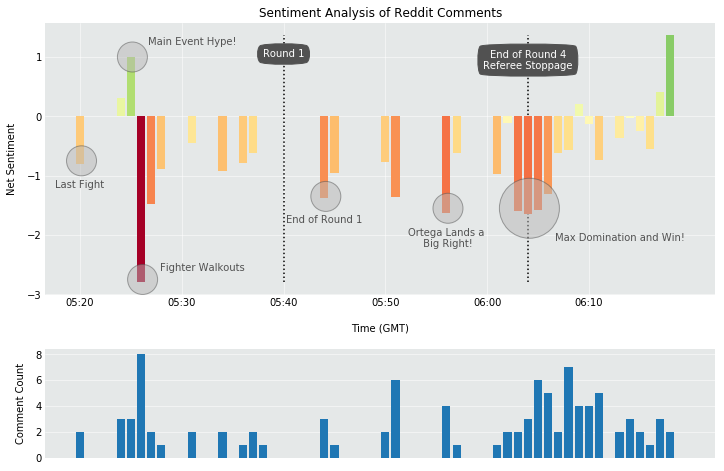

In [219]:
#subplots
plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=4, colspan=1)
plt.title('Sentiment Analysis of Reddit Comments')
plt.xlabel('Time (GMT)', labelpad=15)
plt.ylabel('Net Sentiment', labelpad=10)

ax2 = plt.subplot2grid((6,1), (4,0), rowspan=2, colspan=1, sharex=ax1)
plt.ylabel('Comment Count', labelpad=10)

#X AXIS BY EVERY 10 MINS
x_axis = [datetime.utcfromtimestamp(timestamp).strftime('%H:%M') for timestamp in list(tracker.keys())]
plt.subplots_adjust(hspace=2)

#plot #1
ax1_y_axis = [i for i in tracker.values()]
ax1.bar(x_axis, ax1_y_axis, zorder=2, color=cmap.to_rgba(ax1_y_axis))
global_styles('ax1')

#annotation for plot #1
box_style = dict(boxstyle='round4', fc='191919', ec='191919', pad=.6)
circle_style = dict(boxstyle='circle', fc='404040', ec='191919', alpha=0.5, pad=1)
font_style = {'family':'sans-serif', 'color':'191919', 'size':10, 'ha':'center'}

ax1.annotate(' ', xy=('05:20', -0.8), bbox=circle_style)
ax1.text(x='05:20', y=-1.2, s='Last Fight', fontdict=font_style)
ax1.annotate(' ', xy=('05:25', .95), bbox=circle_style)
ax1.text(x='05:31', y=1.2, s='Main Event Hype!', fontdict=font_style)
ax1.annotate(' ', xy=('05:26', -2.8), bbox=circle_style)
ax1.text(x='05:32', y=-2.6, s='Fighter Walkouts', fontdict=font_style)
ax1.annotate(' ', xy=('05:44', -1.4), bbox=circle_style)
ax1.text(x='05:44', y=-1.8, s='End of Round 1', fontdict=font_style)
ax1.annotate(' ', xy=('05:56', -1.6), bbox=circle_style)
ax1.text(x='05:56', y=-2.2, s='Ortega Lands a\n Big Right!', fontdict=font_style)
ax1.annotate(' ', xy=('06:04', -1.6), bbox=dict(boxstyle='circle', fc='404040', ec='191919', alpha=0.5, pad=2.5))
ax1.text(x='06:13', y=-2.1, s='Max Domination and Win!', fontdict=font_style)

#dotted lines
ax1.vlines('05:40', min(ax1_y_axis), max(ax1_y_axis), linestyle="dotted") #round 1
ax1.annotate('Round 1', xy=('05:40', 1), color='white', horizontalalignment='center', bbox=box_style)
ax1.vlines('06:04', min(ax1_y_axis), max(ax1_y_axis), linestyle="dotted") #fight finished
ax1.annotate('End of Round 4\nReferee Stoppage', xy=('06:04', 0.8), color='white', horizontalalignment='center', 
             bbox=box_style)


#2nd plot
ax2.bar(x_axis, [len(i) for i in comment_list.values()], zorder=2)
global_styles('ax2')
ax2.set_xticks(x_axis[::10])
ax2.get_xaxis().set_visible(False)